# <span style='color:orange'> Machine Learning Course Project <span>

## <span style='color:green'> Training an Auto-Encoder <span>

**Description**: The notebook trains a CNN based autoencoder architecture in an unsupervised condition using data from BRATS 2017. The idea is to learn compact representation of data which can be used as features to predict Overall Survival values for each patient<br>
**Team:** Unlearners

In [1]:
import dataloader as dl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = '/home/asa224/Desktop/students_less_asa224/BRATS2017/MICCAI_BraTS17_Data_Training/HGG/'
images = dl.loadData(data_dir, loadFromDump=False, loadStandardized=False, saveDump=False, verbose=1)

[WARNING] The loader DOES NOT STANDARDIZE DATA, NEITHER IT WRITES STANDARDIZED DATA TO DISK
It can only load standardized data from disk..


Loading images...
Currently on patient 1


/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/2.7.13-SYSTEM/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Currently on patient 2
Currently on patient 3
Currently on patient 4
Currently on patient 5
Currently on patient 6
Currently on patient 7
Currently on patient 8
Currently on patient 9
Currently on patient 10
Currently on patient 11
Currently on patient 12
Currently on patient 13
Currently on patient 14
Currently on patient 15
Currently on patient 16
Currently on patient 17
Currently on patient 18
Currently on patient 19
Currently on patient 20
Currently on patient 21
Currently on patient 22
Currently on patient 23
Currently on patient 24
Currently on patient 25
Currently on patient 26
Currently on patient 27
Currently on patient 28
Currently on patient 29
Currently on patient 30
Currently on patient 31
Currently on patient 32
Currently on patient 33
Currently on patient 34
Currently on patient 35
Currently on patient 36
Currently on patient 37
Currently on patient 38
Currently on patient 39
Currently on patient 40
Currently on patient 41
Currently on patient 42
Currently on patient 43


In [3]:
images = dl.standardize(images)

Calculating mean value..
Calculating standard deviation..
Starting standardization process..
Data standardized!
Done!


## Reshape the training matrix

### In this project, we will be using a 3D Convolutional Neural Network. It is a variation of a standard CNN which works on 3D Volumes. Since Brain MRI data is inherently 3D, and we would like to extract a single feature vector for each of the patient, a 3D Convolutional Network is a natural choice. 

**A Neural Network requires data to be in a specific shape. Currently we have the following shape: (210, 4, 120, 120, 155). To make the shape compatible with how Keras expects it (num_instances, x, y, z, num_channels), we swap the channels [1] and [4]. **

We have to be extra careful here, as swapping and reshaping nd-arrays can lead to undesirable results. 

In [4]:
images.shape

(210, 4, 120, 120, 155)

In [5]:
images_rs = np.swapaxes(images, 1, 2)
images_rs = np.swapaxes(images_rs, 2, 3)
images_rs = np.swapaxes(images_rs, 3, 4)

In [6]:
images_rs.shape

(210, 120, 120, 155, 4)

**To determine whether shape changing was successful, we visualize the data**

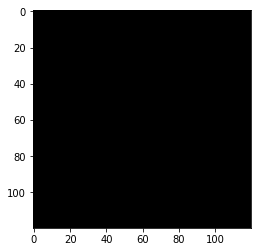

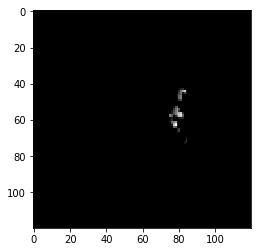

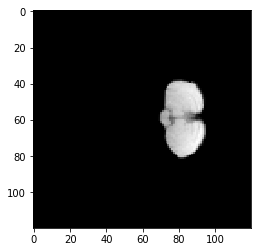

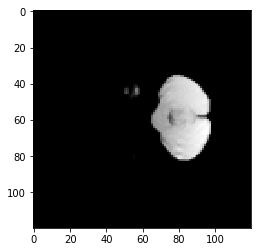

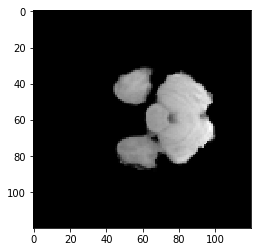

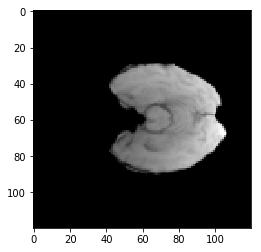

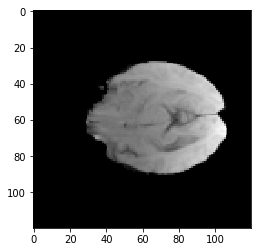

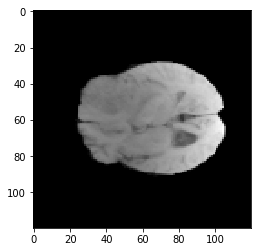

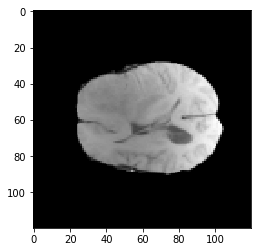

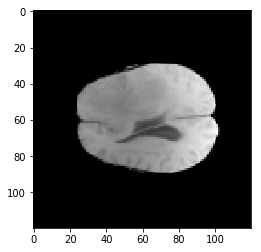

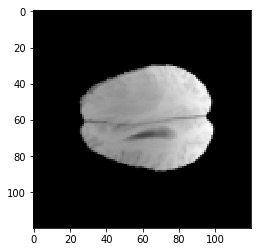

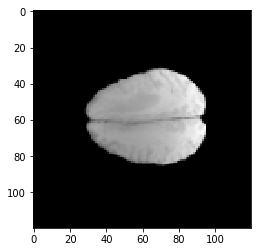

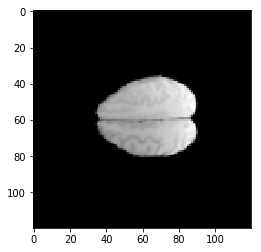

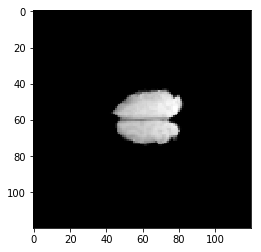

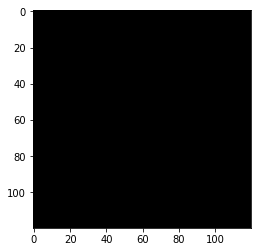

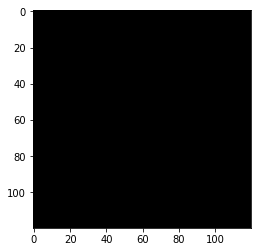

In [7]:
# for i in range(0, 155, 10):
#     plt.imshow(images_rs[2, :, :, i, 1], cmap='gray')
#     plt.show()

** Shape changing was successfull and it behaved in a way that was required and expected.**

## Define network architecture

In [8]:
import keras
from keras.layers import Input, Dense, Conv3D, MaxPooling3D, UpSampling3D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


## Define the 3D ConvNet

1. **AE_3D_epoch-5.h5**: AE Architecture with all kernel sizes = 3, kernel nums decreasing from 64 to 32 to 16. Trained for 5 epochs using "adam".
2. **AE_3D_epoch-10.h5**: AE Architecture with all kernel sizes = 3, kernel nums decreasing from 64 to 32 to 16. Trained for 10 epochs using "adam".
3. **AE_3D_v-2_epoch-5.h5**: AE Architecture with kernel sizes starting from 5,5, to 3. Kernel nums same as 1. Trained for 5 epochs using "adagrad"

params = {

    'Conv_e_1_1': (64, (5,5,5)),
    'Conv_e_1_2': (64, (5,5,5)),
    'Conv_e_2_1': (32, (5,5,5)),
    'Conv_e_2_2': (32, (5,5,5)),
    'Conv_e_3_1': (16, (3,3,3)),
    'Conv_e_3_2': (16, (3,3,3)),
    
    'Conv_d_1_1': (64, (5,5,5)),
    'Conv_d_1_2': (64, (5,5,5)),
    'Conv_d_2_1': (32, (5,5,5)),
    'Conv_d_2_2': (32, (5,5,5)),
    'Conv_d_3_1': (16, (3,3,3)),
    'Conv_d_3_2': (16, (3,3,3)),
    
    'Pool_e_1': (2,2,2),
    'Pool_e_2': (2,2,2),
    'feature': (2,2,2),
    
    'Up_d_1': (2,2,2),
    'Up_d_2': (2,2,2),
    'Up_d_3': (2,2,2),
    
    'output': (4, (1,1,6))
}

**NOTE**: ADAGRAD doesn't work. Stay away from it. 

In [44]:
params = {
    'Conv_e_1_1': (64, (5,5,5)),
    'Conv_e_1_2': (64, (5,5,5)),
    'Conv_e_2_1': (32, (3,3,3)),
    'Conv_e_2_2': (32, (3,3,3)),
    'Conv_e_3_1': (16, (3,3,3)),
    'Conv_e_3_2': (16, (3,3,3)),
    
    'Conv_d_1_1': (64, (5,5,5)),
    'Conv_d_1_2': (64, (5,5,5)),
    'Conv_d_2_1': (32, (3,3,3)),
    'Conv_d_2_2': (32, (3,3,3)),
    'Conv_d_3_1': (16, (3,3,3)),
    'Conv_d_3_2': (16, (3,3,3)),
    
    'Pool_e_1': (2,2,2),
    'Pool_e_2': (2,2,2),
    'feature': (2,2,2),
    
    'Up_d_1': (2,2,2),
    'Up_d_2': (2,2,2),
    'Up_d_3': (2,2,2),
    
    'output': (4, (1,1,6))
}

In [45]:
# def model(params):

input_img = Input(shape=(images_rs.shape[1], images_rs.shape[2], images_rs.shape[3], images_rs.shape[4]))

'''
==============================================================================
Encoder
==============================================================================
'''

x = Conv3D(params['Conv_e_1_1'][0], params['Conv_e_1_1'][1], activation='relu', padding='same', name='Conv_e_1_1')(input_img)
x = Conv3D(params['Conv_e_1_2'][0], params['Conv_e_1_2'][1], activation='relu', padding='same', name='Conv_e_1_2')(x)
x = MaxPooling3D(params['Pool_e_1'], padding='same', name='Pool_e_1')(x)

x = Conv3D(params['Conv_e_2_1'][0], params['Conv_e_2_1'][1], activation='relu', padding='same', name='Conv_e_2_1')(x)
x = Conv3D(params['Conv_e_2_2'][0], params['Conv_e_2_2'][1], activation='relu', padding='same', name='Conv_e_2_2')(x)
x = MaxPooling3D(params['Pool_e_2'], padding='same', name='Pool_e_2')(x)

x = Conv3D(params['Conv_e_3_1'][0], params['Conv_e_3_1'][1], activation='relu', padding='same', name='Conv_e_3_1')(x)
x = Conv3D(params['Conv_e_3_2'][0], params['Conv_e_3_2'][1], activation='relu', padding='same', name='Conv_e_3_2')(x)
encoded = MaxPooling3D(params['feature'], padding='same', name='feature')(x)

'''
==============================================================================
Decoder
==============================================================================
'''

x = Conv3D(params['Conv_d_3_1'][0], params['Conv_d_3_1'][1], activation='relu', padding='same', name='Conv_d_3_1')(encoded)
x = Conv3D(params['Conv_d_3_2'][0], params['Conv_d_3_2'][1], activation='relu', padding='same', name='Conv_d_3_2')(x)
x = UpSampling3D(params['Up_d_3'], name='Up_d_3')(x)

x = Conv3D(params['Conv_d_2_1'][0], params['Conv_d_2_1'][1], activation='relu', padding='same', name='Conv_d_2_1')(x)
x = Conv3D(params['Conv_d_2_2'][0], params['Conv_d_2_2'][1], activation='relu', padding='same', name='Conv_d_2_2')(x)
x = UpSampling3D(params['Up_d_3'], name='Up_d_2')(x)

x = Conv3D(params['Conv_d_1_1'][0], params['Conv_d_1_1'][1], activation='relu', padding='same', name='Conv_d_1_1')(x)
x = Conv3D(params['Conv_d_1_2'][0], params['Conv_d_1_2'][1], activation='relu', padding='same', name='Conv_d_1_2')(x)
x = UpSampling3D(params['Up_d_3'], name='Up_d_1')(x)

decoded = Conv3D(params['output'][0], params['output'][1], activation='linear', padding='valid', name='output')(x)

encoder = Model(input_img, encoded)
autoencoder = Model(input_img, decoded)

In [46]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 120, 120, 155, 4)  0         
_________________________________________________________________
Conv_e_1_1 (Conv3D)          (None, 120, 120, 155, 64) 32064     
_________________________________________________________________
Conv_e_1_2 (Conv3D)          (None, 120, 120, 155, 64) 512064    
_________________________________________________________________
Pool_e_1 (MaxPooling3D)      (None, 60, 60, 78, 64)    0         
_________________________________________________________________
Conv_e_2_1 (Conv3D)          (None, 60, 60, 78, 32)    55328     
_________________________________________________________________
Conv_e_2_2 (Conv3D)          (None, 60, 60, 78, 32)    27680     
_________________________________________________________________
Pool_e_2 (MaxPooling3D)      (None, 30, 30, 39, 32)    0         
__________

In [47]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 120, 120, 155, 4)  0         
_________________________________________________________________
Conv_e_1_1 (Conv3D)          (None, 120, 120, 155, 64) 32064     
_________________________________________________________________
Conv_e_1_2 (Conv3D)          (None, 120, 120, 155, 64) 512064    
_________________________________________________________________
Pool_e_1 (MaxPooling3D)      (None, 60, 60, 78, 64)    0         
_________________________________________________________________
Conv_e_2_1 (Conv3D)          (None, 60, 60, 78, 32)    55328     
_________________________________________________________________
Conv_e_2_2 (Conv3D)          (None, 60, 60, 78, 32)    27680     
_________________________________________________________________
Pool_e_2 (MaxPooling3D)      (None, 30, 30, 39, 32)    0         
__________

## Split training and testing data

In [33]:
X_train, X_test = images_rs[0:209,], images_rs[209:,]

In [34]:
print('Shape of training data: {}'.format(X_train.shape))
print('Shape of testing data: {}'.format(X_test.shape))

Shape of training data: (209, 120, 120, 155, 4)
Shape of testing data: (1, 120, 120, 155, 4)


In [53]:
autoencoder.compile(optimizer='adadelta', loss='mean_absolute_error')

In [54]:
X_train.shape

(209, 120, 120, 155, 4)

In [55]:
autoencoder.input_shape

(None, 120, 120, 155, 4)

In [57]:
from keras.callbacks import ModelCheckpoint

In [58]:
checkpoints = ModelCheckpoint('../models/checkpoints/AE_3D_v-2_epoch-{epoch:02d}-valloss-{val_loss:.2f}.hdf5', 
                              monitor='val_loss', verbose=0, save_best_only=False, 
                              save_weights_only=False, mode='auto', period=1)

In [59]:
epochs = 20
version = 2
history = autoencoder.fit(x=X_train, y=X_train, 
                batch_size=2, 
                epochs=epochs, verbose=1, 
                callbacks=[checkpoints], validation_split=0.0, 
                validation_data=[X_test, X_test], shuffle=True, 
                class_weight=None, sample_weight=None, 
                initial_epoch=0, steps_per_epoch=None, 
                validation_steps=None)

Train on 209 samples, validate on 1 samples
Epoch 1/1
209/209 [==============================] - 667s - loss: 0.1813 - val_loss: 0.3992


In [20]:
# autoencoder.save('../models/AE_3D_v-{}_epoch-{}.h5'.format(version, epochs))

## Visualize how our autoencoder is doing..

In [21]:
# print('Decoding images...')
# decoded_imgs = autoencoder.predict(X_test)
# print('Decoding done!')

Decoding images...
Decoding done!


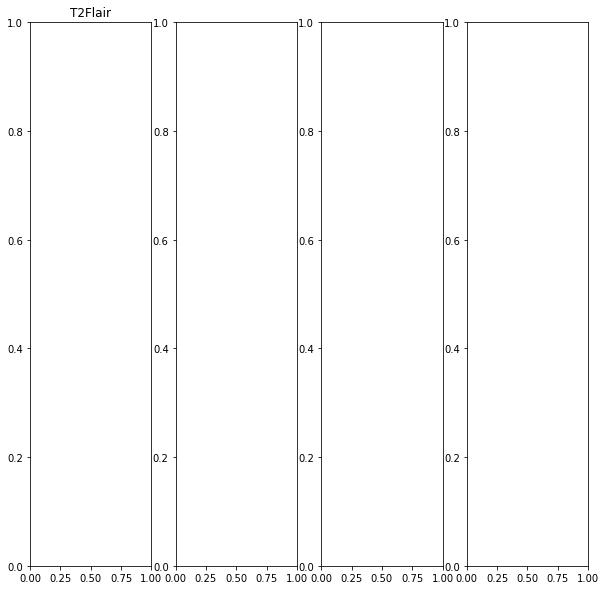

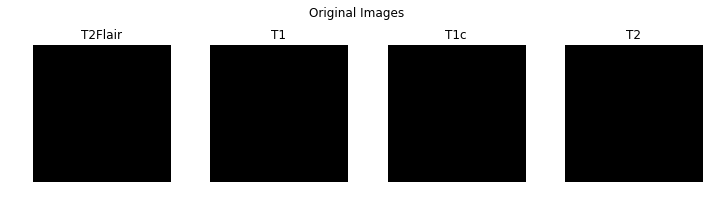

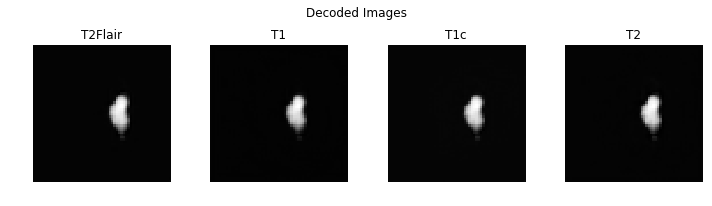

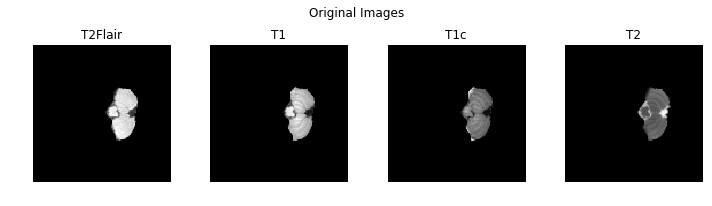

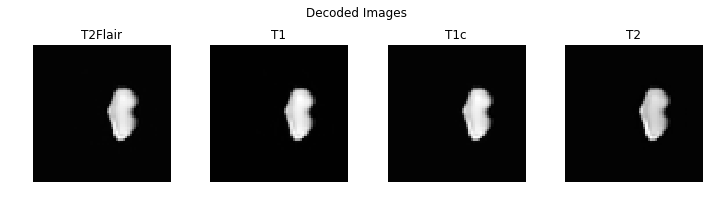

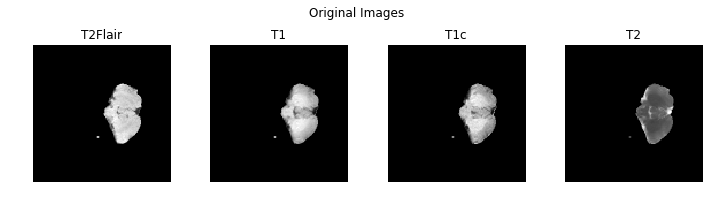

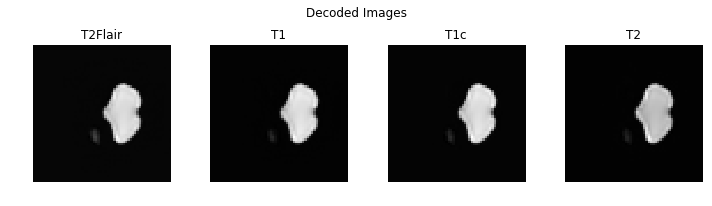

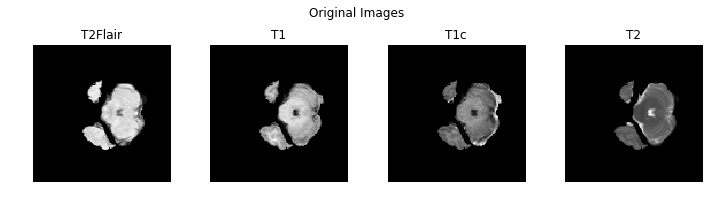

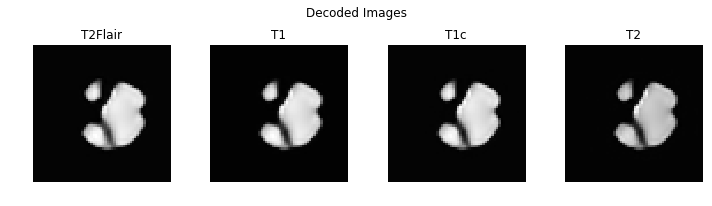

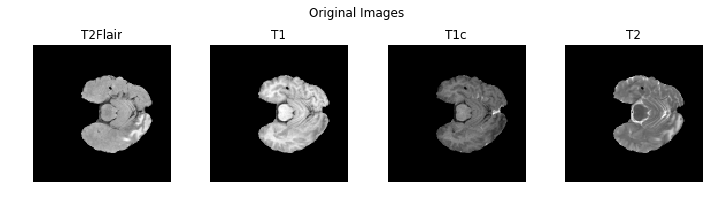

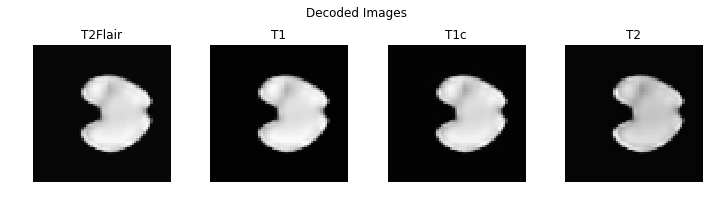

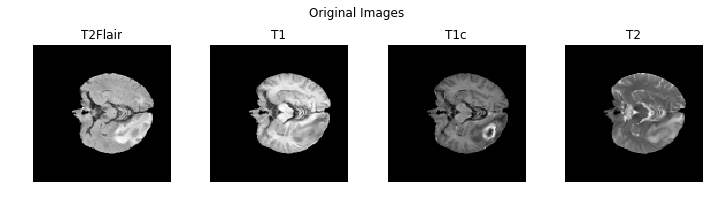

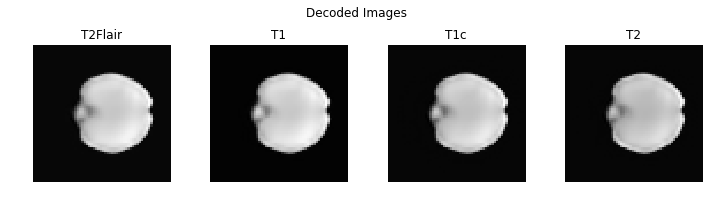

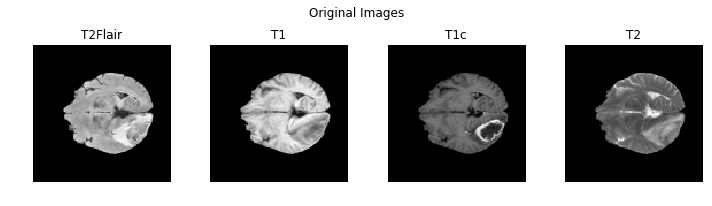

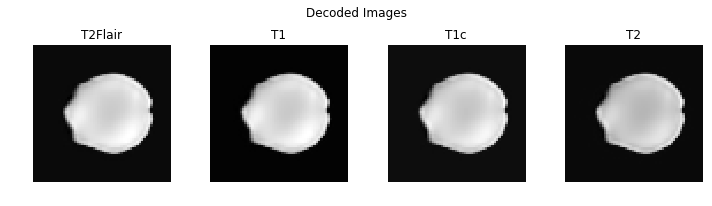

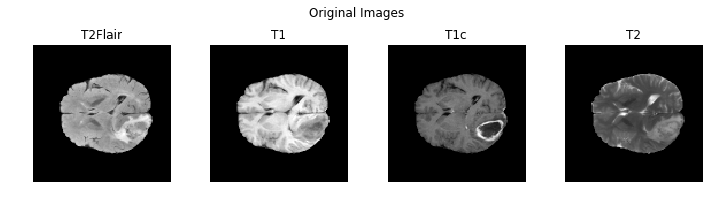

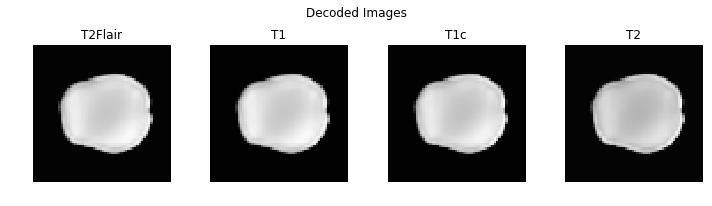

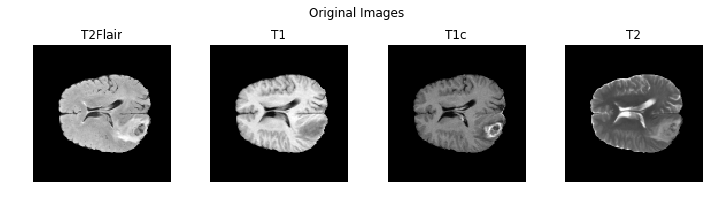

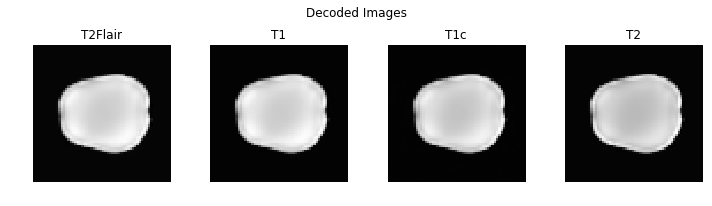

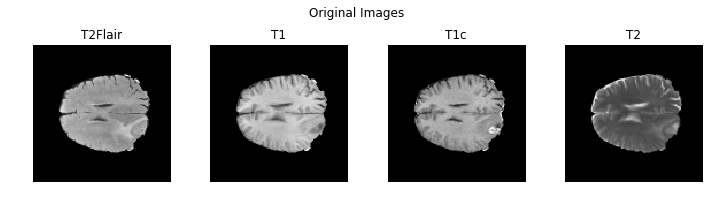

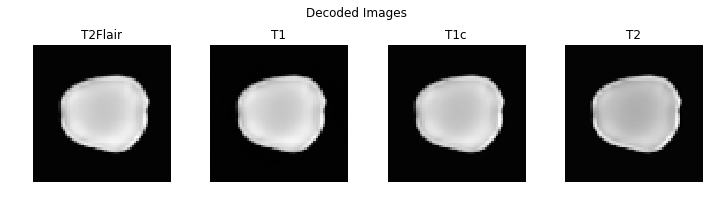

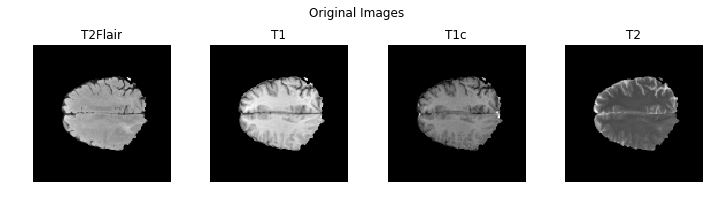

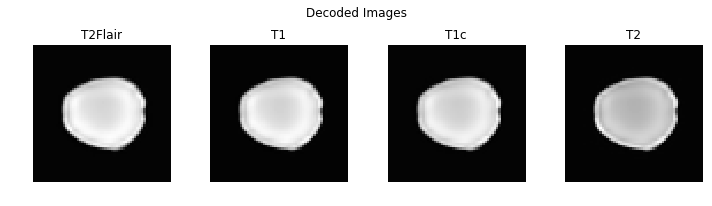

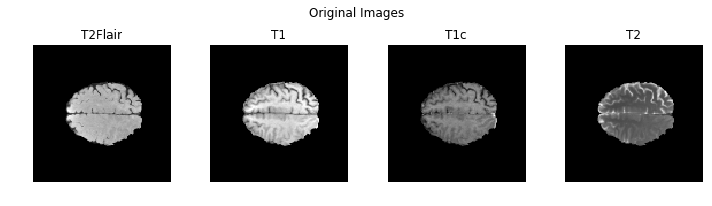

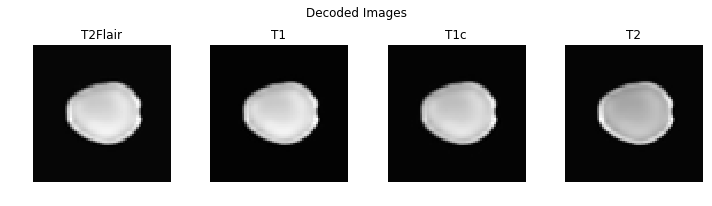

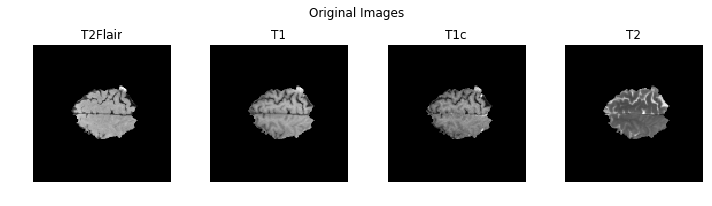

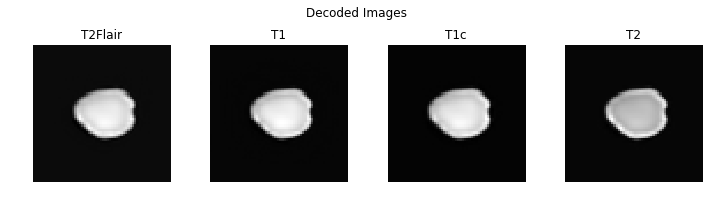

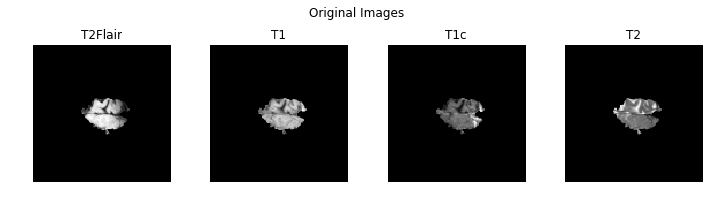

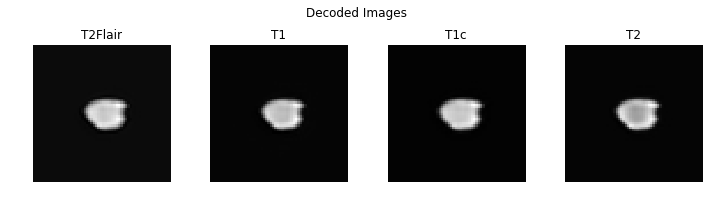

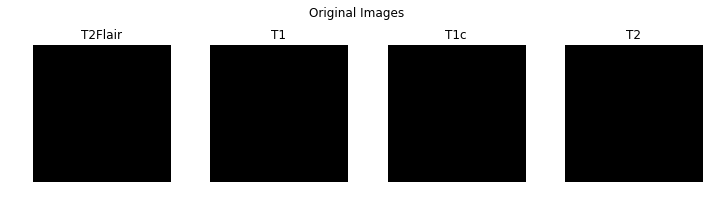

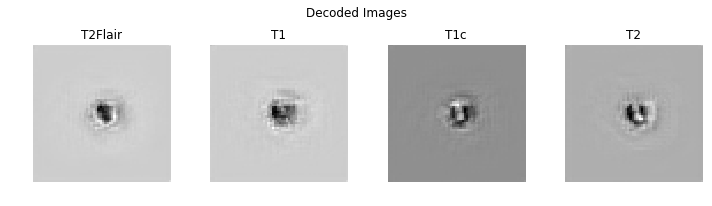

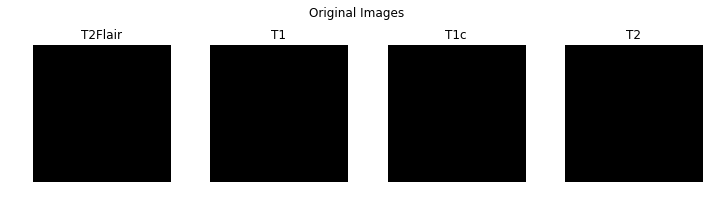

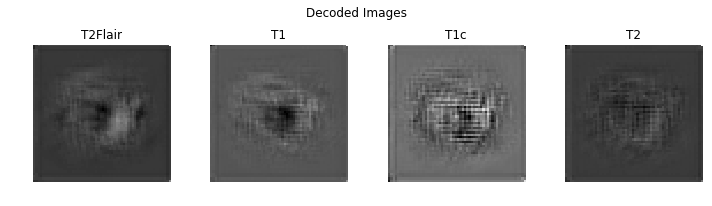

IndexError: index 160 is out of bounds for axis 3 with size 155

In [23]:
# # (32550, 120, 120, 4)
# n = 400
# for i in range(0, n, 10):
#     # display original
#     print('='*100)
#     f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,10))
#     ax1.set_title('T2Flair')
#     ax1.imshow(X_test[0,:,:,i,0], cmap='gray')
#     ax2.set_title('T1')
#     ax2.imshow(X_test[0,:,:,i,1], cmap='gray')
#     ax3.set_title('T1c')
#     ax3.imshow(X_test[0,:,:,i,2], cmap='gray')
#     ax4.set_title('T2')
#     ax4.imshow(X_test[0,:,:,i,3], cmap='gray')
#     ax1.axis('off')
#     ax2.axis('off')
#     ax3.axis('off')
#     ax4.axis('off')
#     f.tight_layout()
#     f.subplots_adjust(top=1.65)
#     plt.suptitle('Original Images')
#     plt.show()

#     # display reconstruction
#     f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,10))
#     ax1.set_title('T2Flair')
#     ax1.imshow(decoded_imgs[0,:,:,i,0], cmap='gray')
#     ax2.set_title('T1')
#     ax2.imshow(decoded_imgs[0,:,:,i,1], cmap='gray')
#     ax3.set_title('T1c')
#     ax3.imshow(decoded_imgs[0,:,:,i,2], cmap='gray')
#     ax4.set_title('T2')
#     ax4.imshow(decoded_imgs[0,:,:,i,3], cmap='gray')
#     ax1.axis('off')
#     ax2.axis('off')
#     ax3.axis('off')
#     ax4.axis('off')
#     f.tight_layout()
#     f.subplots_adjust(top=1.65)
#     plt.suptitle('Decoded Images')
#     plt.show()
#     print('='*100)
#     print('\n')